<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Эффективность-обогащения" data-toc-modified-id="Эффективность-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Эффективность обогащения</a></span></li><li><span><a href="#Сравнение-обучающей-и-тестовой-выборок" data-toc-modified-id="Сравнение-обучающей-и-тестовой-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Сравнение обучающей и тестовой выборок</a></span></li><li><span><a href="#Изучение-пропусков" data-toc-modified-id="Изучение-пропусков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Изучение пропусков</a></span></li><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-концентраций-металлов" data-toc-modified-id="Изучение-концентраций-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение концентраций металлов</a></span></li><li><span><a href="#Изучение-распределения-размера-гранул" data-toc-modified-id="Изучение-распределения-размера-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение распределения размера гранул</a></span></li><li><span><a href="#Изучение-суммарной-концентрации-металлов" data-toc-modified-id="Изучение-суммарной-концентрации-металлов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучение суммарной концентрации металлов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Итоговые-результаты" data-toc-modified-id="Итоговые-результаты-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Итоговые результаты</a></span></li><li><span><a href="#Sanity-check" data-toc-modified-id="Sanity-check-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Sanity check</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

In [1]:
!pip install tune_sklearn -q

In [2]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [3]:
#miscellaneous
import pandas as pd
import matplotlib.pyplot as plt
#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#training and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from catboost import cv, Pool
from tune_sklearn import TuneSearchCV
from ray import tune
#models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.dummy import DummyRegressor

## Подготовка данных

### Загрузка данных

In [4]:
train_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv')
test_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv')
source_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv')

In [5]:
train_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [7]:
test_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [9]:
source_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [10]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Данные прочитаны без ошибок. Дата указана в строковом формате. Конвертируем её

In [11]:
test_df['date'] = pd.to_datetime(test_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])
source_df['date'] = pd.to_datetime(source_df['date'])

### Эффективность обогащения

Подготовим функию расчёта эффективности обогащения

In [12]:
def recovery(final, rough, tail):
    return (final * (rough - tail)) / (rough * (final - tail)) * 100

Расчитаем итоговую эффективность и MAE

In [13]:
final = train_df['final.output.concentrate_au']
tail = train_df['final.output.tail_au']
rough = train_df['rougher.input.feed_au']
mean_absolute_error(train_df['final.output.recovery'], recovery(final, rough, tail))

8.569602032360358e-15

MAE имеет порядок e-15, формула верна.

### Сравнение обучающей и тестовой выборок

Рассмотрим признаки, присутствующие в обучающей выборке и отсутствующие в тестовой

In [14]:
train_df.columns[~train_df.columns.isin(test_df.columns)]

Index(['rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol', 'rougher.output.recovery',
       'rougher.output.tail_au', 'rougher.output.tail_ag',
       'rougher.output.tail_pb', 'rougher.output.tail_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_ag',
       'secondary_cleaner.output.tail_pb', 'secondary_cleaner.ou

В тестовой выборке отсутствуют признаки, относящиеся к двум категориям:
1. расчётные
2. результаты промедуточных стадий процесса

### Изучение пропусков

Рассмотрим пропуски в данных

In [15]:
train_df.isna().mean()[train_df.isna().mean() > 0] * 100

rougher.input.feed_pb                                 0.493861
rougher.input.feed_sol                                0.528157
rougher.input.feed_rate                               0.048014
rougher.input.feed_size                               0.692777
rougher.input.floatbank10_sulfate                     0.212635
rougher.input.floatbank10_xanthate                    0.048014
rougher.state.floatbank10_e_air                       2.942589
rougher.input.floatbank11_sulfate                     0.246931
rougher.input.floatbank11_xanthate                    2.791687
rougher.calculation.sulfate_to_au_concentrate         0.006859
rougher.calculation.floatbank10_sulfate_to_au_feed    0.006859
rougher.calculation.floatbank11_sulfate_to_au_feed    0.006859
rougher.output.concentrate_sol                        0.123465
rougher.output.tail_ag                                0.006859
primary_cleaner.input.sulfate                         0.157761
primary_cleaner.input.depressant                      0

In [16]:
have_missed = train_df.isna().mean()[train_df.isna().mean() > 0].index
train_df[have_missed].describe()

,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_e_air,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,...,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14150.000000,14543.000000,14172.000000,1.457800e+04,...,14578.000000,14578.000000,14575.000000,13659.000000,14578.000000,14578.000000,14387.000000,14578.000000,14504.000000,14574.000000
mean,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1082.778201,12.095857,6.047261,4.435219e+04,...,18.927405,14.441265,5.617182,7.111347,5.192145,9.923809,9.566676,9.731972,2.719985,10.612745
std,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,176.092308,3.887128,1.115055,1.325109e+05,...,5.550829,4.416497,2.704951,3.909951,1.388014,1.706976,2.805654,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-1.982295,0.000077,0.000290,-1.548858e+07,...,-0.079426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,998.562148,9.999625,5.399770,4.077084e+04,...,14.985721,12.479139,3.801206,3.784897,4.283347,9.103183,7.860030,8.088928,2.036512,9.013412
50%,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1050.081856,12.000777,6.096038,4.487892e+04,...,19.960798,15.448510,5.227419,7.629968,5.118647,10.046455,9.301970,9.818512,2.774847,10.670515
75%,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1199.518951,14.821675,6.800713,4.838894e+04,...,23.038231,17.349683,7.609340,10.367050,5.925380,10.981203,11.001573,11.169187,3.353845,12.130827
max,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1922.636637,37.980648,9.698407,3.428099e+06,...,32.188906,23.264738,17.042505,26.000772,16.001945,16.705297,19.423912,19.552149,5.804178,22.317730


In [17]:
test_df.isna().mean()[test_df.isna().mean() > 0] * 100

rougher.input.feed_pb                         0.576132
rougher.input.feed_sol                        0.452675
rougher.input.feed_rate                       0.082305
rougher.input.feed_size                       0.905350
rougher.input.floatbank10_sulfate             0.061728
rougher.input.floatbank10_xanthate            0.020576
rougher.state.floatbank10_a_air               0.020576
rougher.state.floatbank10_a_level             0.020576
rougher.state.floatbank10_b_air               0.020576
rougher.state.floatbank10_b_level             0.020576
rougher.state.floatbank10_c_air               0.020576
rougher.state.floatbank10_c_level             0.020576
rougher.state.floatbank10_e_air               0.144033
rougher.input.floatbank11_sulfate             0.164609
rougher.input.floatbank11_xanthate            0.946502
primary_cleaner.input.sulfate                 0.020576
primary_cleaner.input.depressant              0.185185
primary_cleaner.input.xanthate                0.884774
primary_cl

In [18]:
have_missed = test_df.isna().mean()[test_df.isna().mean() > 0].index
test_df[have_missed].describe()

,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,1312.346061,-472.506533,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,159.001709,49.376824,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,767.656587,-649.997496,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,1199.741605,-500.218827,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,1300.278835,-499.827934,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,1401.691789,-449.925513,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,1802.528564,-298.836629,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


Процент пропусков невелик (максимум - 6.3% в обучающей выборке). Поскольку мы имеем дело с данными непрерывного техпроцесса, можно предположить, что соседние значения будут схожи, а значит можно будет заполнить пропуски, например, предыдущим значением. Проверим это предположение

<Axes: >

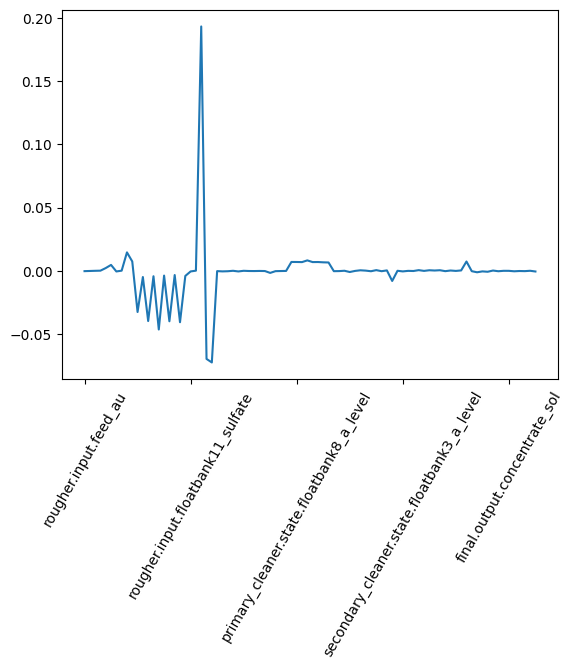

In [68]:
train_df.drop('date', axis = 1).diff().describe().loc['mean', :].plot(rot = 60)

<Axes: >

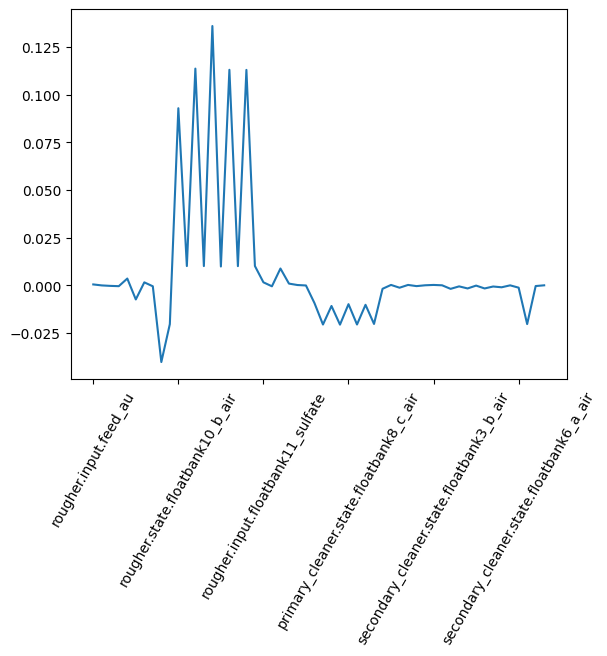

In [69]:
test_df.drop('date', axis = 1).diff().describe().loc['mean', :].plot(rot = 60)

Максимальная средняя разница - 3.5 для одного из признаков в тренировочном датасете.

In [21]:
train_df.drop('date', axis = 1).diff().describe().loc['mean', :].sort_values().tail(1)

rougher.calculation.sulfate_to_au_concentrate    3.422883
Name: mean, dtype: float64

Это расчётные признак, который не будет использован в обучении. Все остальные признаки имеют среднюю разницу между соседними записями, близкую к нулю, что позволяет нам заполнить пропуски предыдущими значениями

In [22]:
train_df = train_df.fillna(method = 'ffill')
test_df = test_df.fillna(method = 'ffill')

### Подготовка данных для моделей

Подготовим список признаков - это будут данные, которые присуствуют и в обучающем и тестовом наборе, за исключением даты. Целевые признаки - эффективность после флотации и итоговая

In [23]:
features = train_df.columns[train_df.columns.isin(test_df.columns)].drop('date')
features_rougher = features[features.str.contains('rougher')]
target = ['rougher.output.recovery', 'final.output.recovery']

Данные имеют разный масштаб. Для некоторых моделей это может быть критично. Подготовим скейлер

In [24]:
scaler = StandardScaler()

Подготовим данные для обучения моделей

In [25]:
x_train = scaler.fit_transform(train_df[features])
x_train = pd.DataFrame(x_train, columns = features)
y_train = train_df[target]

В тестовом наборе отсутствуют целевые признаки. Восстановим их из исходных данных

In [26]:
test_df = test_df.merge(source_df[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date')
test_df[target].head()

,rougher.output.recovery,final.output.recovery
0,89.514960,70.281454
1,89.858126,65.523246
2,91.816623,74.817644
3,88.478959,63.082720
4,89.230316,74.463380


Подготовим тестовые данные

In [27]:
x_test = scaler.transform(test_df[features])
x_test = pd.DataFrame(x_test, columns = features)
y_test = test_df[target]

## Анализ данных

### Изучение концентраций металлов

Изучим изменение концентрации металлов по этапам

In [28]:
def get_data_for_metal(df, metal):
    param = 'output.concentrate_'
    stages = ['rougher.input.feed_', 'rougher.', 'primary_cleaner.', 'final.']
    fig, axs = plt.subplots(1, 4, figsize=(15, 3))
    fig.suptitle(metal)
    for i in range(4):
        if stages[i] != 'rougher.input.feed_':
            name = (stages[i] + param + metal)
        else:
            name = (stages[i] + metal)
        axs[i].hist(train_df[name], density = True)
        axs[i].set_title(stages[i])


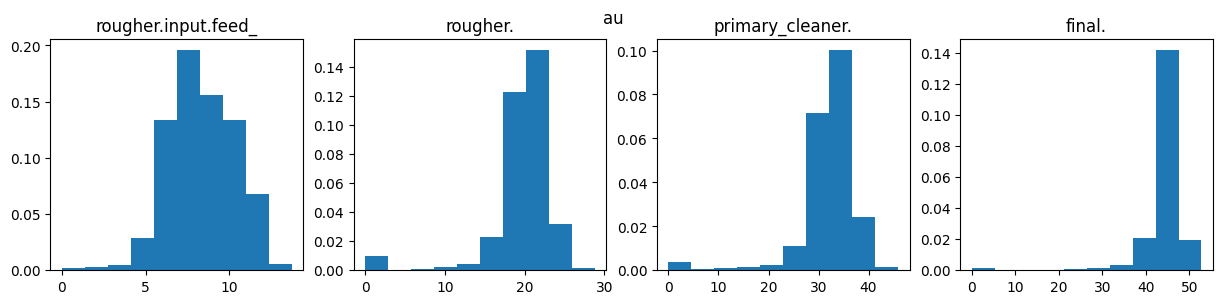

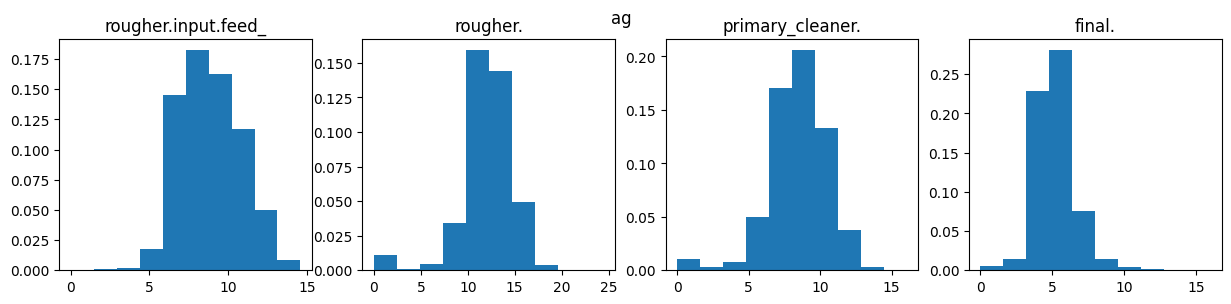

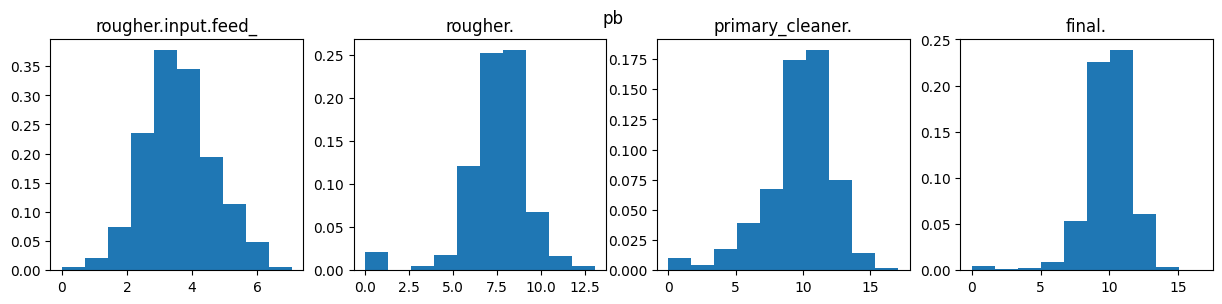

In [29]:
metals = ['au', 'ag', 'pb']
for metal in metals:
    get_data_for_metal(train_df, metal)

В целом, для всех металлов характерно сползание пика частоты на гистограмме "вправо" и/или повышение значения пиковой частоты (см. например свинец при переходе от вторичной очистки к готовому продукту). Также наблюдаются пики частот около нуля.

### Изучение распределения размера гранул

Сравним распределения размеров гранул сырья в обучающей с тестовой выборках

<Axes: >

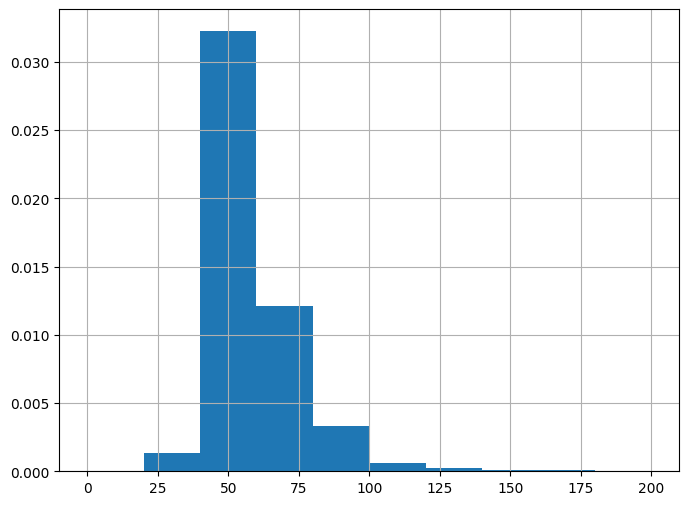

In [30]:
x_range = [0, 200]
train_df['rougher.input.feed_size'].hist(density=True, range = x_range, figsize = (8, 6))

In [31]:
train_df['rougher.input.feed_size'].describe()

count    14579.000000
mean        59.070865
std         22.903811
min          0.049194
25%         47.322462
50%         54.464259
75%         64.469177
max        484.967466
Name: rougher.input.feed_size, dtype: float64

<Axes: >

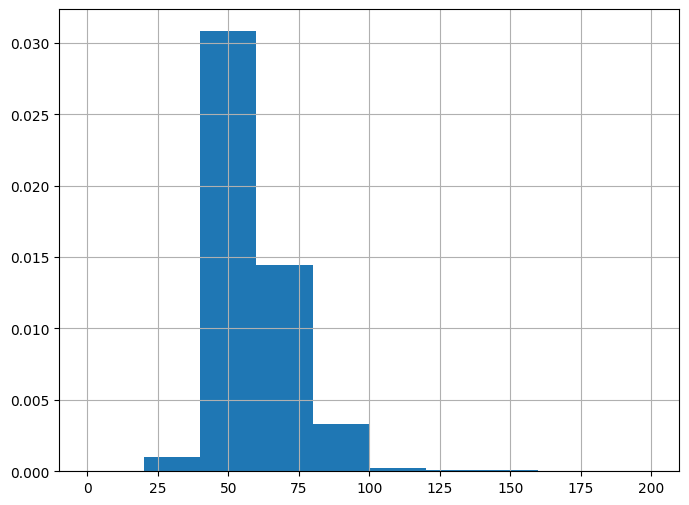

In [32]:
test_df['rougher.input.feed_size'].hist(density=True, range = x_range, figsize = (8, 6))

In [33]:
test_df['rougher.input.feed_size'].describe()

count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

Гистограммы имеют сходную форму, квартили лежат близко друг к другу. Делаем вывод, что распределения сходны.

### Изучение суммарной концентрации металлов

Изучим суммарную концентрацию металлов по этапам очистки

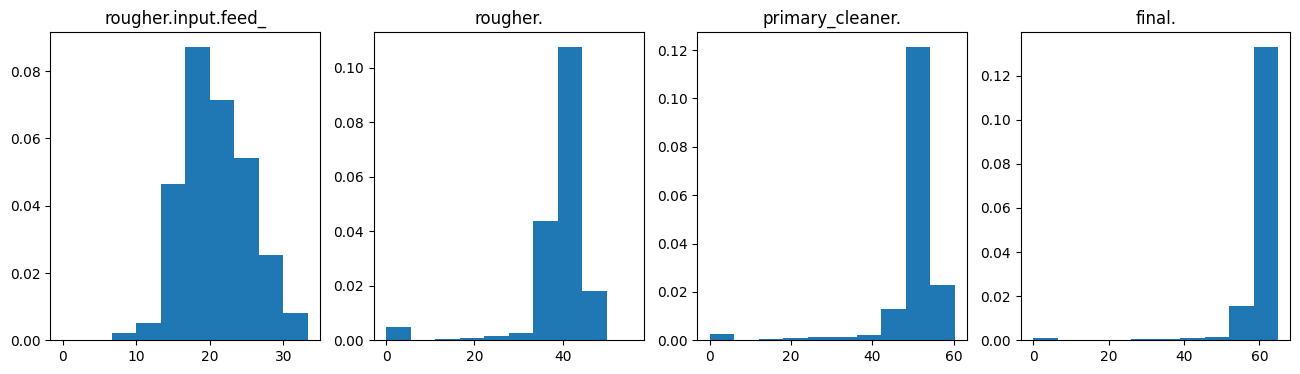

In [34]:
stages = ['rougher.input.feed_', 'rougher.', 'primary_cleaner.', 'final.']
param = 'output.concentrate_'
metals = ['au', 'ag', 'pb']
columns = []

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    if stages[i] != 'rougher.input.feed_':
        name = (stages[i] + param)
    else:
        name = (stages[i])
    data = 0
    for metal in metals:
        data += train_df[name + metal]
        columns.append(name + metal)
    axs[i].hist(data , density = True)
    axs[i].set_title(stages[i])

От стадии к стадии пик распределения смещается вправо, то есть растёт как само максимальное значение, так и частота его появления (так, например, на гистограмме для финального продукта, максимум концентрации и является самым частым значением)

Удалим данные с нулевыми значениями концентраций из обучающих данных

In [35]:
columns

['rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb']

In [36]:
for column in columns:
    train_df = train_df[train_df[column] != 0]

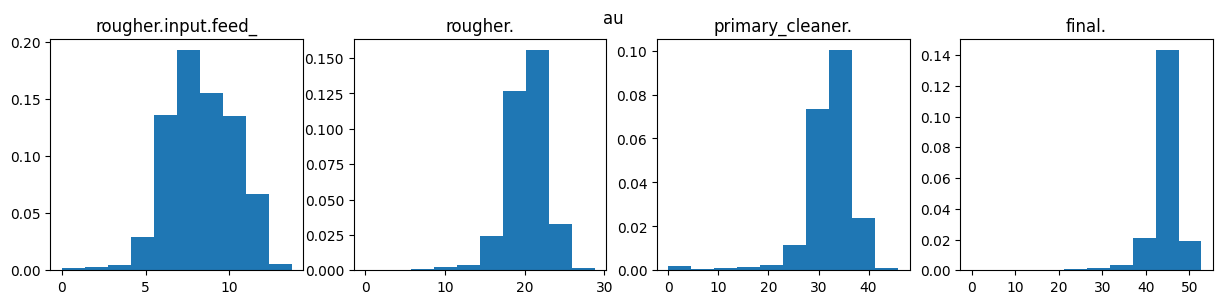

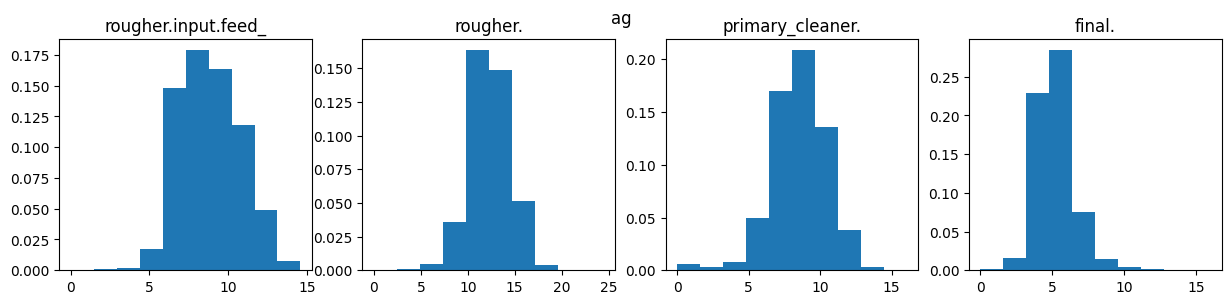

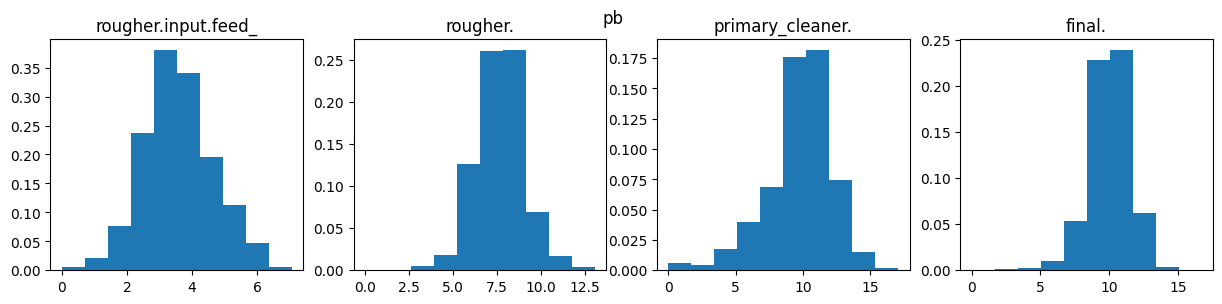

In [37]:
for metal in metals:
    get_data_for_metal(x_train, metal)

## Модель

In [38]:
x_train = scaler.fit_transform(train_df[features])
x_train = pd.DataFrame(x_train, columns = features)
y_train = train_df[target]

x_test = scaler.transform(test_df[features])
x_test = pd.DataFrame(x_test, columns = features)
y_test = test_df[target]

### sMAPE

Подготовим функцию вычисления sMAPE и создатим из неё scorer для использования в кросс-валидации

*Примечание: кросс-валидация sklearn работает по принципу максимизации метрики, а значит что результаты нашего scorer'а будут с отрицательным знаком*

In [39]:
def smape(y, y_pred):
    return (abs(y - y_pred) / ((abs(y) + abs(y_pred)) / 2)).mean() * 100

smape_scorer = make_scorer(smape, greater_is_better = False)

def final_score(rough, final):
    return 0.25 * rough + 0.75 * final

cv_parameters = {
    'scoring' : smape_scorer,
    'cv' : 3
    }

### Линейная регрессия

In [40]:
lin_regressor_rougher = LinearRegression()
lin_regressor_final = LinearRegression()
linear_scores = []

In [41]:
linear_scores.append(
    cross_val_score(lin_regressor_rougher, x_train[features_rougher], y_train.iloc[:,0], **cv_parameters).mean()
    )
linear_scores[0]

-7.586053784559596

In [42]:
linear_scores.append(
    cross_val_score(lin_regressor_final, x_train, y_train.iloc[:,1], **cv_parameters).mean()
    )
linear_scores[1]

-10.913458780813073

In [43]:
linear_scores.append(final_score(linear_scores[0], linear_scores[1]))

In [44]:
linear_scores

[-7.586053784559596, -10.913458780813073, -10.081607531749704]

In [45]:
lin_regressor_rougher.fit(x_train[features_rougher], y_train.iloc[:,0])
lin_regressor_final.fit(x_train, y_train.iloc[:,1])

LinearRegression()

### Random Forest

In [46]:
forest_params = {'n_estimators' : [i for i in range(50, 101, 10)], 'max_depth' : [i for i in range(1, 10)]}

In [47]:
forest_rougher_search = TuneSearchCV(RandomForestRegressor(random_state = 42), forest_params, **cv_parameters)

In [48]:
%%time

forest_rougher_search.fit(x_train[features_rougher], y_train.iloc[:,0])

2023-11-19 11:41:47,506	INFO worker.py:1673 -- Started a local Ray instance.
2023-11-19 11:41:49,903	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2023-11-19 11:41:49,917	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2023-11-19_11-41-49   |
+-------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator            |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 10                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2023-11-19_11-41-49
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2023-11-19_11-41-49`

CPU times: user 13.2 s, sys: 1.08 s, total: 14.3 s
Wall time: 3min


TuneSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), mode='max',
             n_jobs=-1,
             param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                  'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring=make_scorer(smape, greater_is_better=False), sk_n_jobs=1)

In [49]:
forest_rougher_search.best_estimator_, forest_rougher_search.best_score_

(RandomForestRegressor(max_depth=4, n_estimators=60, random_state=42),
 -6.480809311188381)

In [50]:
forest_final_search = TuneSearchCV(RandomForestRegressor(random_state = 42), forest_params, **cv_parameters)

In [51]:
%%time

forest_final_search.fit(x_train, y_train.iloc[:,1])

2023-11-19 11:44:43,463	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2023-11-19_11-44-43   |
+-------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator            |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 10                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2023-11-19_11-44-43
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2023-11-19_11-44-43`

CPU times: user 13 s, sys: 793 ms, total: 13.8 s
Wall time: 7min 37s


TuneSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), mode='max',
             n_jobs=-1,
             param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                  'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring=make_scorer(smape, greater_is_better=False), sk_n_jobs=1)

In [52]:
forest_final_search.best_estimator_, forest_final_search.best_score_

(RandomForestRegressor(max_depth=1, n_estimators=50, random_state=42),
 -9.745307292425592)

In [53]:
forest_scores = [forest_rougher_search.best_score_,
                 forest_final_search.best_score_,
                 final_score(forest_rougher_search.best_score_, forest_final_search.best_score_)]

forest_scores

[-6.480809311188381, -9.745307292425592, -8.929182797116288]

### CatBoost

Для оценки catboost регрессора воспольуемся кросс-валидацией из библиотеки catboost. В отличие от sklearn, она имеет встроенную метрику sMAPE.

In [54]:
cb_params = {'eval_metric': 'SMAPE',
             'loss_function': 'RMSE',
             'learning_rate': 0.2,
             'iterations' : 1000,
             'random_seed': 42,
             'verbose':100}

train_data_rougher = Pool(data=x_train[features_rougher],
                  label=y_train.iloc[:,0]
                 )

cb_scores = []

In [55]:
cv_data_rougher = cv(
    params = cb_params,
    pool = train_data_rougher,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200
)

Training on fold [0/3]

bestTest = 2.988982179
bestIteration = 986

Training on fold [1/3]

bestTest = 3.039278805
bestIteration = 998

Training on fold [2/3]

bestTest = 2.987298317
bestIteration = 999



In [56]:
train_data_final = Pool(data=x_train,
                  label=y_train.iloc[:,1]
                 )

In [57]:
cv_data_final = cv(
    params = cb_params,
    pool = train_data_final,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200
)

Training on fold [0/3]

bestTest = 6.078447923
bestIteration = 780

Training on fold [1/3]

bestTest = 5.998949465
bestIteration = 988

Training on fold [2/3]

bestTest = 5.961738618
bestIteration = 994



In [58]:
cb_scores = [cv_data_rougher['test-SMAPE-mean'].min(),
                 cv_data_final['test-SMAPE-mean'].min(),
                 final_score(cv_data_rougher['test-SMAPE-mean'].min(), cv_data_final['test-SMAPE-mean'].min())]

cb_scores

[3.005379323115722, 6.01576289921267, 5.263167005188433]

In [59]:
cb_regressor_rougher = CatBoostRegressor(**cb_params)
cb_regressor_rougher.fit(train_data_rougher)

0:	learn: 6.2575154	total: 9.83ms	remaining: 9.82s
100:	learn: 3.0101902	total: 888ms	remaining: 7.91s
200:	learn: 2.4882472	total: 1.76s	remaining: 6.98s
300:	learn: 2.1773586	total: 2.63s	remaining: 6.1s
400:	learn: 1.9560304	total: 3.48s	remaining: 5.2s
500:	learn: 1.7801811	total: 5.34s	remaining: 5.32s
600:	learn: 1.6360712	total: 7.26s	remaining: 4.82s
700:	learn: 1.5144613	total: 9.23s	remaining: 3.94s
800:	learn: 1.4149889	total: 10.6s	remaining: 2.64s
900:	learn: 1.3184808	total: 11.5s	remaining: 1.26s
999:	learn: 1.2264271	total: 12.3s	remaining: 0us


In [60]:
cb_regressor_final = CatBoostRegressor(**cb_params)
cb_regressor_final.fit(train_data_final)

0:	learn: 9.1291939	total: 19.9ms	remaining: 19.9s
100:	learn: 5.5701149	total: 1.79s	remaining: 16s
200:	learn: 4.7387338	total: 3.56s	remaining: 14.2s
300:	learn: 4.1901942	total: 5.33s	remaining: 12.4s
400:	learn: 3.7549178	total: 7.08s	remaining: 10.6s
500:	learn: 3.4016339	total: 9.98s	remaining: 9.94s
600:	learn: 3.0979600	total: 13.8s	remaining: 9.15s
700:	learn: 2.8308626	total: 15.8s	remaining: 6.75s
800:	learn: 2.5994410	total: 17.6s	remaining: 4.37s
900:	learn: 2.3944310	total: 19.3s	remaining: 2.13s
999:	learn: 2.2036143	total: 21.1s	remaining: 0us


### Итоговые результаты

In [61]:
results = pd.DataFrame(
    [linear_scores, forest_scores, cb_scores],
    columns = ['rougher', 'output', 'final'],
    index = ['linear', 'forest', 'catboost']).abs()
results

,rougher,output,final
linear,7.586054,10.913459,10.081608
forest,6.480809,9.745307,8.929183
catboost,3.005379,6.015763,5.263167


Наилучшие результаты показывает catboost. Проверим его на тестовой выборке

In [62]:
predict_rougher = cb_regressor_rougher.predict(x_test[features_rougher])
predict_final = cb_regressor_final.predict(x_test)

In [63]:
smape(predict_rougher, y_test.iloc[:,0])

2.8219493986500312

In [64]:
smape(predict_final, y_test.iloc[:,1])

6.1329304023366396

In [65]:
final_score(smape(predict_rougher, y_test.iloc[:,0]), smape(predict_final, y_test.iloc[:,1]))

5.305185151414987

### Sanity check

Проверим модель на адекватность, сравнив с константной моделью "предсказывающей" среднее значение

In [66]:
dummy_reg_rougher = DummyRegressor(strategy = 'mean')
dummy_reg_final = DummyRegressor(strategy = 'mean')
dummy_reg_rougher.fit(x_train[features_rougher], y_train.iloc[:,0])
dummy_reg_final.fit(x_train, y_train.iloc[:,1])
dummy_pred_rougher = dummy_reg_rougher.predict(x_test[features_rougher])
dummy_pred_final = dummy_reg_rougher.predict(x_test)

In [67]:
[smape(dummy_pred_rougher, y_test.iloc[:,0]),
smape(dummy_pred_final, y_test.iloc[:,1]),
final_score(smape(dummy_pred_rougher, y_test.iloc[:,0]), smape(dummy_pred_final, y_test.iloc[:,1]), )]

[6.107461859252015, 23.151329842268233, 18.890362846514176]

Все значения sMAPE константной модели больше, чем у catboost. Модель прошла проверку на адекватность

## Вывод

Изучены данные технологического процесса обогащения руды.

1. Проверена формула расчёта эффективности обогащения. Результаты расчёта совпадают с данными в выборке с MAE порядка e-15
2. Проведено сравнение обучающей и тестовой выборок. В тестововй выборке отсутствуют расчётные параметры и данные о результатах промежуточных ступеней процесса. Эти параметры исключены из обучения моделей.
3. Проведена предобработка данных
    - пропуски заполнены предыдущими значениями
    - проведено масштабирование
4. Проведён анализ изменения концентраций металлов на различных этапах техпроцесса. В целом, для всех металлов характерно сползание пика частоты на гистограмме "вправо" и/или повышение значения пиковой частоты (см. например свинец при переходе от вторичной очистки к готовому продукту).  Также наблюдаются пики частот около нуля.
5. Проведён анализ распределений размеров гранул сырья в обучающей и тестовой выборках. Распределения сходны.
6. Изучена суммарная концентрация металлов на различных этапах техпроцесса. От стадии к стадии пик распределения смещается вправо, то есть растёт как само максимальное значение, так и частота его появления (так, например, на гистограмме для финального продукта, максимум концентрации и является самым частым значением)
7. Подготовлена функция для расчёта sMAPE
8. Обучены модели линейной регрессии, ramdom forest, catboost regressor. На кросс-валидации лучше всего себя показал catboost regressor - итоговое sMAPE = 8.36%
9. Произведена проверка модели на тестовой выборке - итоговое sMAPE = 5.3%
10. Проведено сравнение с константной моделью. Итоговое sMAPE константной модели - 18.9%.